In [1]:
import lightkurve as lk
from lightkurve import search_lightcurvefile
import numpy as np
from tqdm import tqdm

In [12]:
# Boeing + stars listed in table 1. Yu et al 2018
kics = [4448777, 2570518, 4682420, 4946632,5446355] 
#         5340720, 5446355, 6197448, 6429836, 
#         6435899, 6756156, 7445517, 8265154,
#         8509198, 9285761, 9475300, 10318430, 
#         10420502, 10675935, 11026843, 11600442, 
#         12555883]

In [13]:
lcs = {}

for target in tqdm(kics):
    lc_ = search_lightcurvefile(target).download_all()
    lc = lc_[0].PDCSAP_FLUX
    for l in lc_:
        lc = lc.append(l.PDCSAP_FLUX)
    lcs[target] = lc

100%|██████████| 5/5 [00:36<00:00,  7.46s/it]


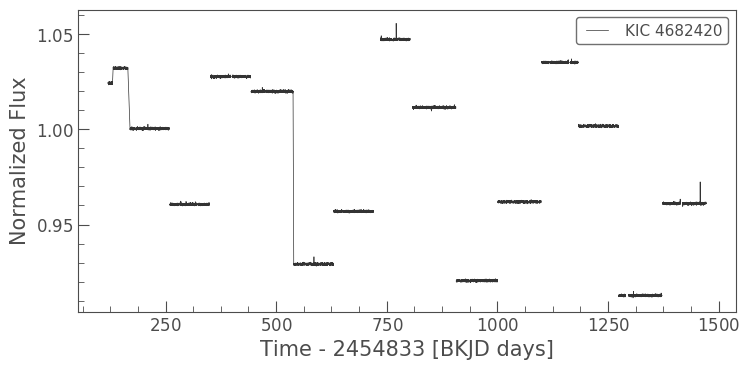

In [14]:
lcs[kics[np.random.randint(len(kics))]].plot()

In [15]:
corr_lcs = {}
for k,v in lcs.items():
    print(k,v)
    corr_lcs[k] = v.normalize().remove_nans().flatten(window_length=101).remove_outliers(4)

4448777 KeplerLightCurve(ID: 4448777)


/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages

2570518 KeplerLightCurve(ID: 2570518)


/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages

4682420 KeplerLightCurve(ID: 4682420)
4946632 KeplerLightCurve(ID: 4946632)


/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:612: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/home/oliver/.local/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:609: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/oliver/.local/lib/python3.6/site-packages

5446355 KeplerLightCurve(ID: 5446355)


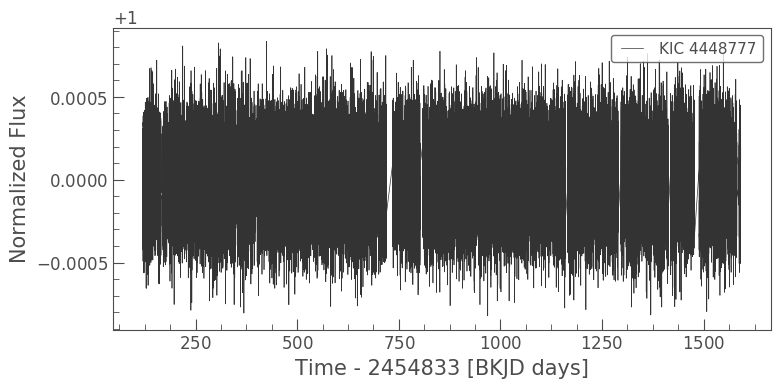

In [16]:
corr_lcs[kics[np.random.randint(len(kics))]].plot()

In [17]:
snr = {}
for k,v in corr_lcs.items():
    snr[k] = v.to_periodogram(normalization='psd',
                              maximum_frequency=288, minimum_frequency=1).flatten()

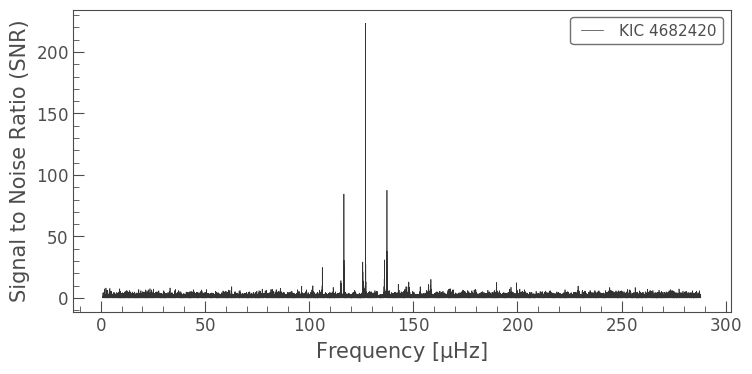

In [18]:
snr[kics[np.random.randint(len(kics))]].plot()

In [19]:
seismo = {}
for k,v in snr.items():
    numax = v.estimate_numax()
    dnu = v.estimate_dnu(numax=numax)
    seismo[k] = [numax, dnu]

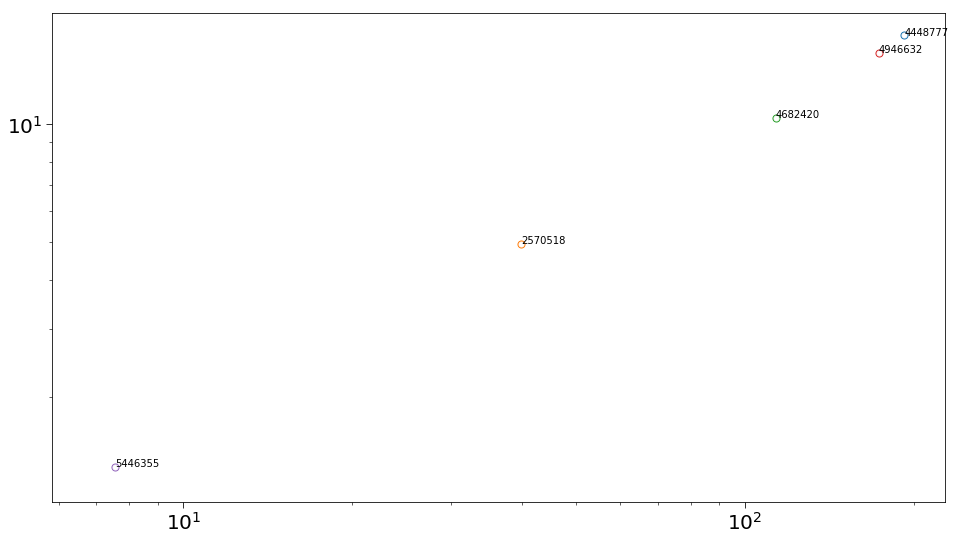

In [20]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=[16,9])
for k, v in seismo.items():
    ax.scatter(v[0], v[1], label=k, s=50)
    ax.scatter(v[0], v[1], c='w', s=25)
    ax.text(v[0].value, v[1].value, str(k))
#ax.set_xlim([60, 288])
#ax.set_ylim([5, 20])
ax.set_xscale('log')
ax.set_yscale('log')

[<Quantity 7.55350759 uHz>, <Quantity 1.32366982 uHz>]


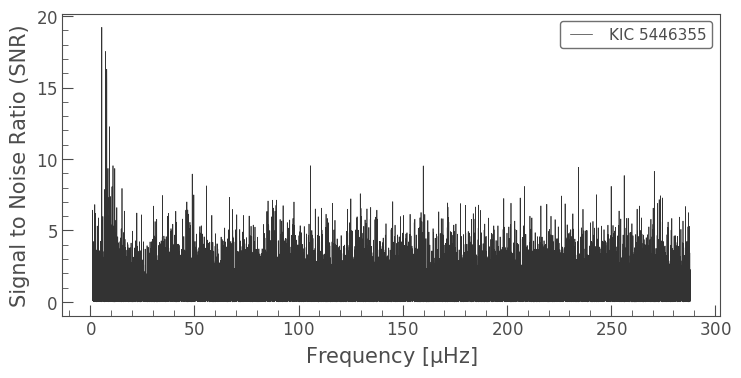

In [21]:
inspect = 5446355 #kics[np.random.randint(len(kics))]
print(seismo[inspect])
snr[inspect].plot()

(0.95, 1.0)

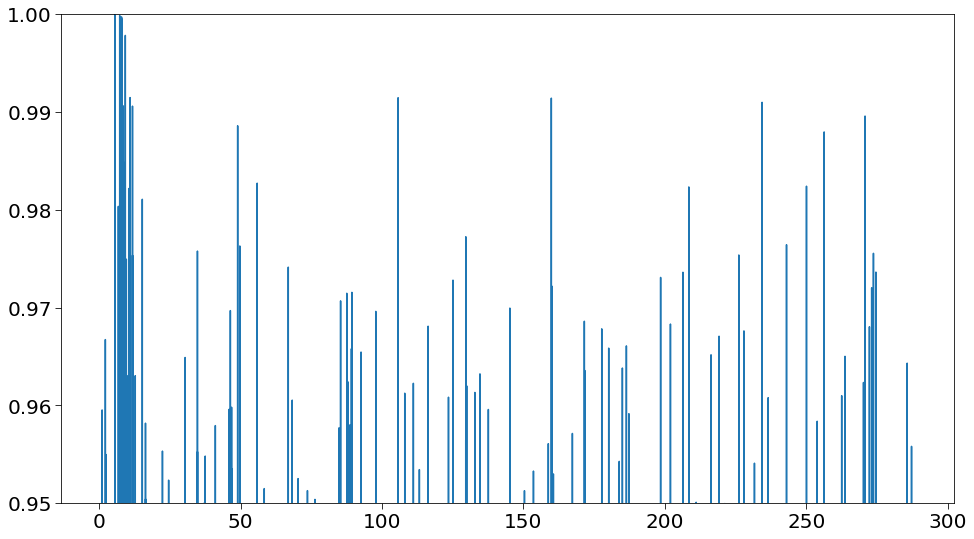

In [22]:
fig, ax = plt.subplots(figsize=[16,9])
f = snr[inspect].frequency.value
p = snr[inspect].power.value

ax.plot(f, 1- (np.exp(-p/2)))
# ax.set_yscale('log')
ax.set_ylim([0.95,1.0])

In [ ]:
numax = snr[inspect].estimate_numax(show_plots=True)[0]
print(numax)

In [ ]:
dnu = snr[inspect].estimate_dnu(numax=numax, show_plots=True)[0]
print(dnu)


In [ ]:
snr[inspect].plot_echelle(dnu=dnu, numax=numax, power_log=False)

In [ ]:
snr[inspect].smooth(filter_width=0.3).plot_echelle(dnu=dnu, numax=numax, power_log=False)

In [ ]:
snr[inspect]._get_fwhm(numax)